## Part I: Research Quesiton:    
#### A1. What variables have the most effect on churn?
#### A2. Goal is to figure out what variables affect, or have the most influence on churning. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Cleaning plan:
1. change columns to lowercase 
        ## columns.str.lower()
2. Drop columns: Interaction, UID, item# as I don't forsee using those  
        # df.drop(['column'], axis=1, inplace=True)
3. Select explanatory variables
4. Re-express any categorical variables
5. Check for outliers

In [5]:
#creating a copy of the original.
df_clean = df.copy()

In [6]:
#1. #lowercase column names and verify
df_clean.columns = df_clean.columns.str.lower()
df_clean.head(1)

,caseorder,customer_id,interaction,uid,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611,5,5,5,3,4,4,3,4


In [7]:
#2. dropping columns and verify
df_clean.drop(['interaction', 'population'], axis=1, inplace=True)
df_clean.drop(['uid'], axis=1, inplace=True)
df_clean.drop(['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'], axis=1, inplace=True)
df_clean.head(1)

,caseorder,customer_id,city,state,county,zip,lat,lng,area,timezone,job,children,age,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year
0,1,K409198,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611


No missing data, as I could see all colums had 10000 rows

Variables I want to use: age, income, gender (one hot), outage_sec_perweek, email, contacts, yearly_equip_failure, contract (ordinal), monthlycharge, tenure, and bandwidth_gb_year.

I am going to drop the columns not using for this analysis and future models.

## Starting exploratory analysis

In [8]:
df_clean.drop(['zip', 'city', 'state', 'county', 'lat', 'lng', 'area', 'marital', 'timezone', 'job', 'children', 'techie', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'], axis=1, inplace=True)
df_clean.head(1)

,caseorder,customer_id,age,income,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,contract,tenure,monthlycharge,bandwidth_gb_year
0,1,K409198,68,28561.99,Male,No,7.978323,10,0,1,One year,6.795513,172.455519,904.53611


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   caseorder             10000 non-null  int64  
 1   customer_id           10000 non-null  object 
 2   age                   10000 non-null  int64  
 3   income                10000 non-null  float64
 4   gender                10000 non-null  object 
 5   churn                 10000 non-null  object 
 6   outage_sec_perweek    10000 non-null  float64
 7   email                 10000 non-null  int64  
 8   contacts              10000 non-null  int64  
 9   yearly_equip_failure  10000 non-null  int64  
 10  contract              10000 non-null  object 
 11  tenure                10000 non-null  float64
 12  monthlycharge         10000 non-null  float64
 13  bandwidth_gb_year     10000 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [10]:
df_clean.describe()

,caseorder,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2886.89568,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,1.00000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,2500.75000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,5000.50000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,7500.25000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10000.00000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


### Summary Statistics:
Dataset has 10,000 rows, started with 49 columns, narrowed down to 11.

Minimum monthly charge is $79, max is $290, average charge is around $172 with a standard deviation of $43. 

The average tenure is just shy of 3 years (34 months)

The average income is just under $40,000 ($39,806)

# Univariate / Bivariate analysis of variables

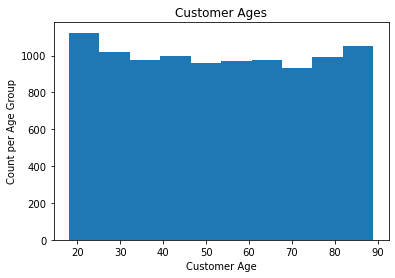

In [11]:
plt.hist(df_clean['age'])
plt.xlabel('Customer Age')
plt.ylabel('Count per Age Group')
plt.title('Customer Ages');

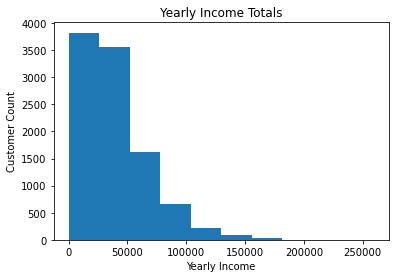

In [12]:
plt.hist(df_clean['income'])
plt.xlabel('Yearly Income')
plt.ylabel('Customer Count')
plt.title('Yearly Income Totals');

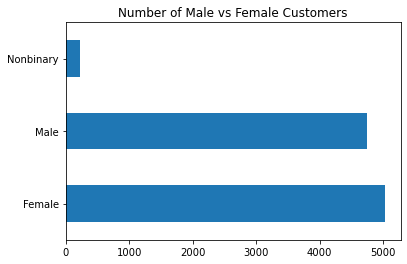

In [13]:
df_clean.gender.value_counts().plot.barh()
plt.title('Number of Male vs Female Customers');

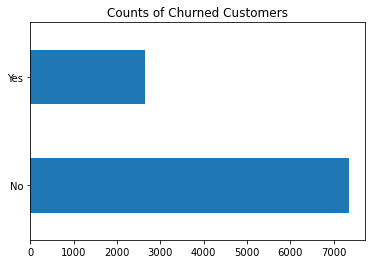

In [14]:
df_clean.churn.value_counts().plot.barh()
plt.title('Counts of Churned Customers')
plt.show()

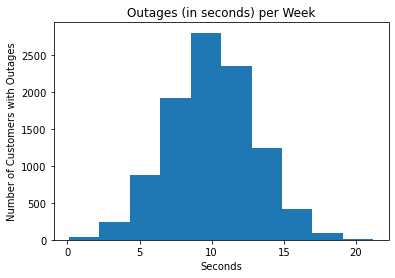

In [15]:
plt.hist(df_clean['outage_sec_perweek'])
plt.xlabel('Seconds')
plt.ylabel('Number of Customers with Outages')
plt.title('Outages (in seconds) per Week');

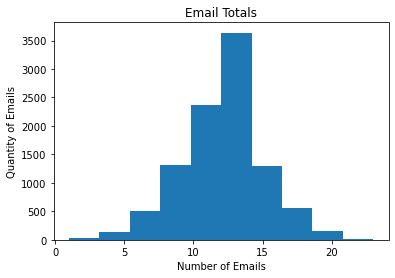

In [16]:
plt.hist(df_clean['email'])
plt.xlabel('Number of Emails')
plt.ylabel('Quantity of Emails')
plt.title('Email Totals');

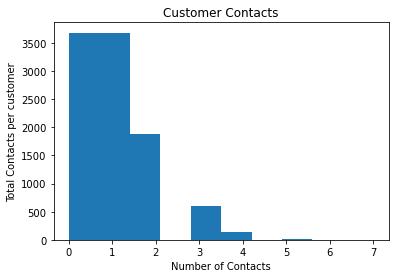

In [17]:
plt.hist(df_clean['contacts'])
plt.xlabel('Number of Contacts')
plt.ylabel('Total Contacts per customer')
plt.title('Customer Contacts');

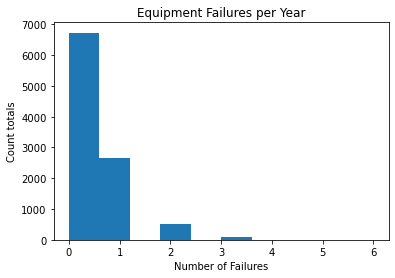

In [18]:
plt.hist(df_clean['yearly_equip_failure'])
plt.xlabel('Number of Failures')
plt.ylabel('Count totals')
plt.title('Equipment Failures per Year');

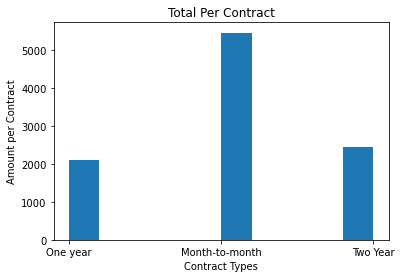

In [19]:
plt.hist(df_clean['contract'])
plt.xlabel('Contract Types')
plt.ylabel('Amount per Contract')
plt.title('Total Per Contract');

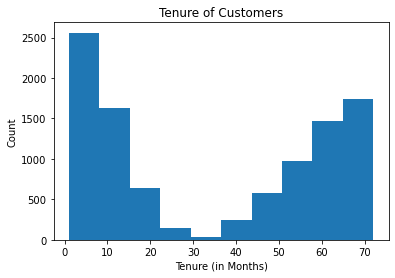

In [20]:
plt.hist(df_clean['tenure'])
plt.xlabel('Tenure (in Months)')
plt.ylabel('Count')
plt.title('Tenure of Customers');

Tenure histogram is a bell curve (not normal distribution)

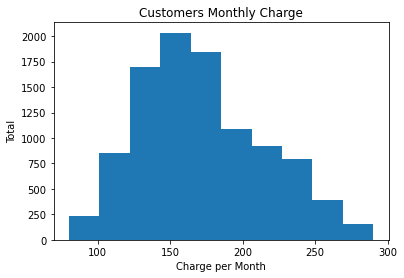

In [21]:
plt.hist(df_clean['monthlycharge'])
plt.xlabel('Charge per Month')
plt.ylabel('Total')
plt.title('Customers Monthly Charge');

### Bivariate analysis

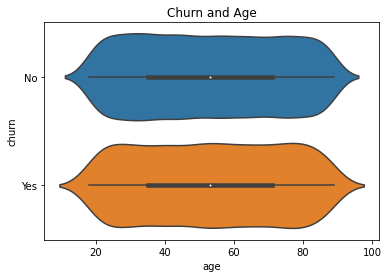

In [22]:
import seaborn as sns
sns.violinplot(data=df_clean, x='age', y='churn')
plt.title('Churn and Age');

Text(0.5, 1.0, 'Income in relation to Churn')

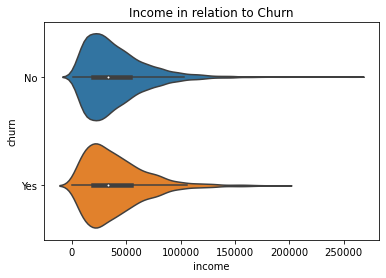

In [23]:
sns.violinplot(data=df_clean, y='churn', x='income')
plt.title('Income in relation to Churn')

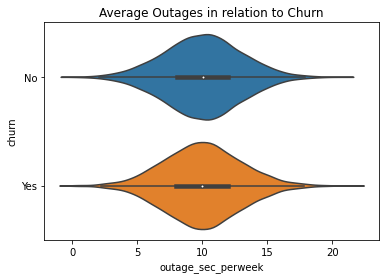

In [24]:
sns.violinplot(data=df_clean, y='churn', x='outage_sec_perweek')
plt.title('Average Outages in relation to Churn');

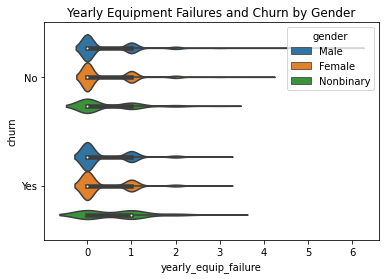

In [25]:
sns.violinplot(data=df_clean, y="churn", x='yearly_equip_failure', hue='gender')
plt.title('Yearly Equipment Failures and Churn by Gender');

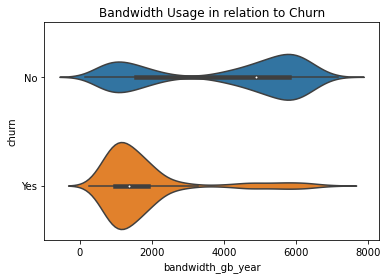

In [26]:
sns.violinplot(data=df_clean, y='churn', x='bandwidth_gb_year')
plt.title('Bandwidth Usage in relation to Churn');

Text(0.5, 1.0, 'Emails/Contacts by churn')

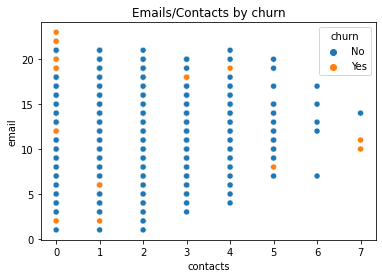

In [27]:
sns.scatterplot(data=df_clean, y='email', x='contacts', hue='churn')
plt.title('Emails/Contacts by churn')

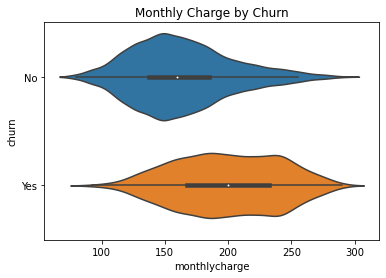

In [28]:
sns.violinplot(x='monthlycharge', y='churn', data=df_clean)
plt.title('Monthly Charge by Churn');

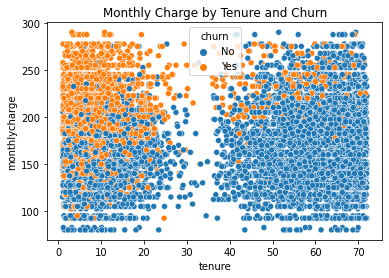

In [29]:
sns.scatterplot(data=df_clean, y="monthlycharge", x='tenure', hue='churn')
plt.title('Monthly Charge by Tenure and Churn');

In [30]:
df_clean.corr()

,caseorder,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year
caseorder,1.000000,0.016038,0.000192,-0.001358,-0.011274,0.004361,0.005497,0.832550,0.003677,0.825561
age,0.016038,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724
income,0.000192,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674
outage_sec_perweek,-0.001358,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176
email,-0.011274,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579
contacts,0.004361,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299
yearly_equip_failure,0.005497,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034
tenure,0.832550,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495
monthlycharge,0.003677,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406
bandwidth_gb_year,0.825561,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000


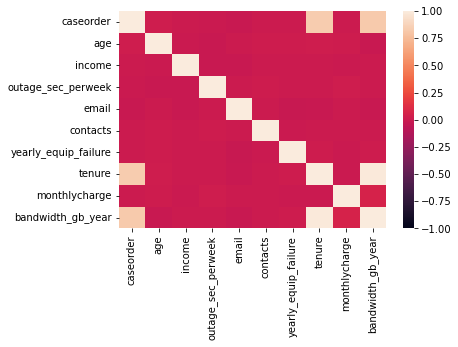

In [31]:
sns.heatmap(df_clean.corr(), vmin=-1, vmax=1);

I don't see a lot of strong correlations amongst the variables.

## Re-expressing categorical variables
yes = 1, no = 0

In [32]:
df_clean['churn'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['churn'].unique()

array([0, 1], dtype=int64)

In [33]:
categories = ['contract', 'gender']
dummies = pd.get_dummies(df_clean[categories], drop_first=True)
df_clean = pd.concat([df_clean, dummies], axis=1)
df_clean.drop(['contract', 'gender'], axis=1, inplace=True)
df_clean.head()

,caseorder,customer_id,age,income,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,contract_One year,contract_Two Year,gender_Male,gender_Nonbinary
0,1,K409198,68,28561.99,0,7.978323,10,0,1,6.795513,172.455519,904.536110,1,0,1,0
1,2,S120509,27,21704.77,1,11.699080,12,0,1,1.156681,242.632554,800.982766,0,0,0,0
2,3,K191035,50,9609.57,0,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,0,0
3,4,D90850,48,18925.23,0,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,1,1,0
4,5,K662701,83,40074.19,1,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,1,0


In [34]:
#lowercase the new column headers
df_clean.columns = df_clean.columns.str.lower()
df_clean.head()

,caseorder,customer_id,age,income,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,contract_one year,contract_two year,gender_male,gender_nonbinary
0,1,K409198,68,28561.99,0,7.978323,10,0,1,6.795513,172.455519,904.536110,1,0,1,0
1,2,S120509,27,21704.77,1,11.699080,12,0,1,1.156681,242.632554,800.982766,0,0,0,0
2,3,K191035,50,9609.57,0,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,0,0
3,4,D90850,48,18925.23,0,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,1,1,0
4,5,K662701,83,40074.19,1,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,1,0


In [35]:
# remove spacing/inconsistencies with the new columns
df_clean.columns = df_clean.columns.str.replace(' ', '')
df_clean.head()

,caseorder,customer_id,age,income,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,contract_oneyear,contract_twoyear,gender_male,gender_nonbinary
0,1,K409198,68,28561.99,0,7.978323,10,0,1,6.795513,172.455519,904.536110,1,0,1,0
1,2,S120509,27,21704.77,1,11.699080,12,0,1,1.156681,242.632554,800.982766,0,0,0,0
2,3,K191035,50,9609.57,0,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,0,0
3,4,D90850,48,18925.23,0,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,1,1,0
4,5,K662701,83,40074.19,1,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,1,0


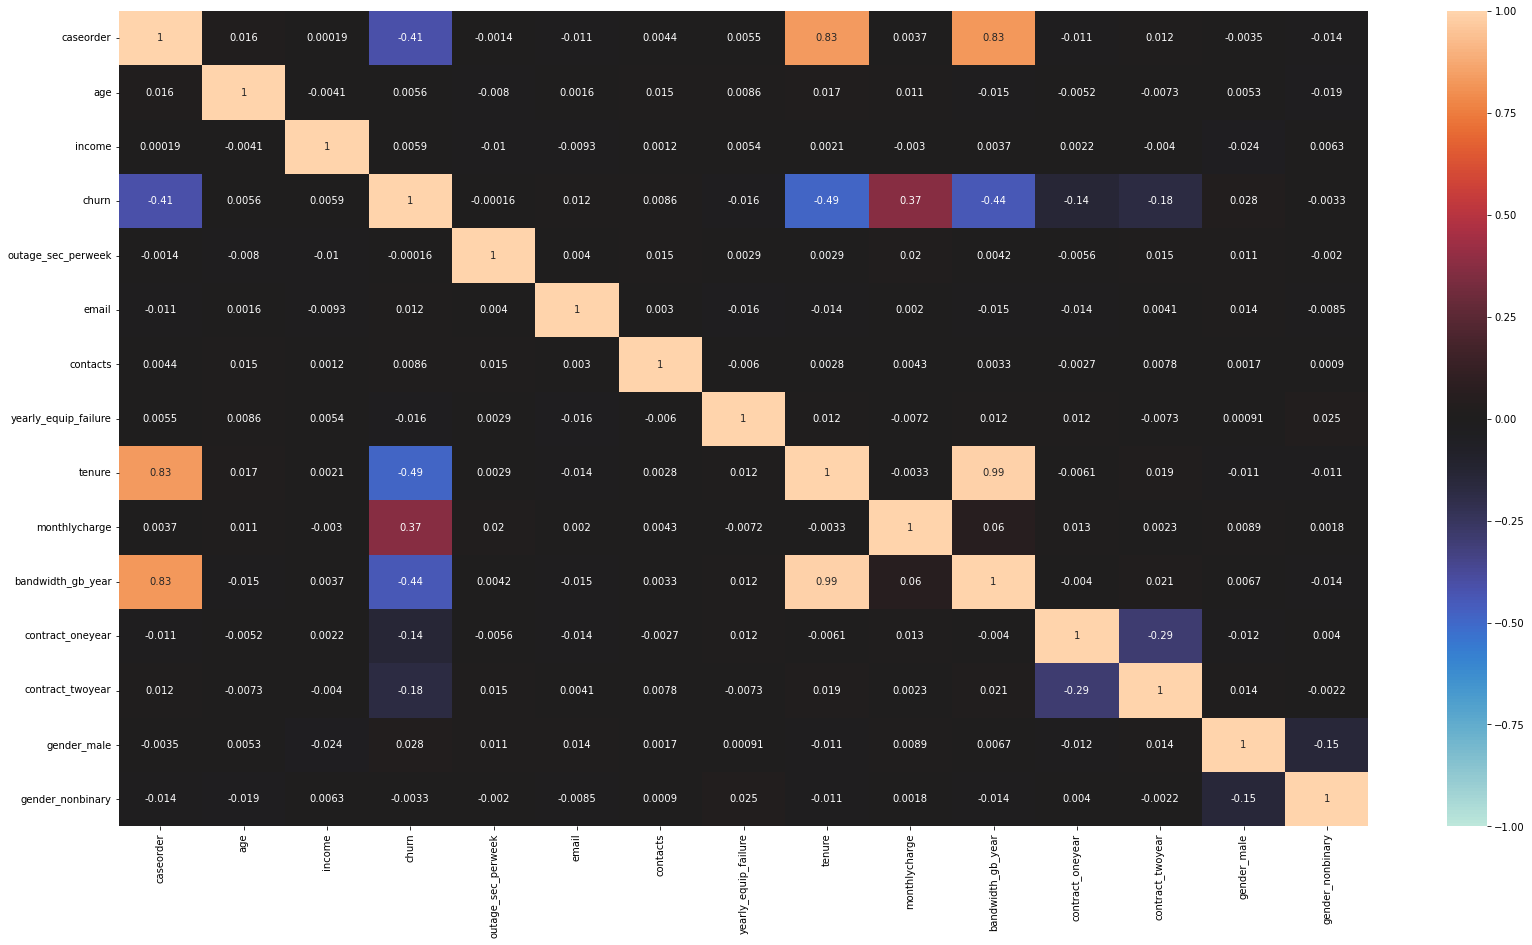

In [36]:
#putting heatmap again for the dummy variables
plt.figure(figsize=(28,15))
sns.heatmap(df_clean.corr(), annot=True, center=0, vmin=-1, vmax=1);

# Ready for Initial Model

In [37]:
# create df_train
df_train = df_clean.copy()
df_train.head()

,caseorder,customer_id,age,income,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,contract_oneyear,contract_twoyear,gender_male,gender_nonbinary
0,1,K409198,68,28561.99,0,7.978323,10,0,1,6.795513,172.455519,904.536110,1,0,1,0
1,2,S120509,27,21704.77,1,11.699080,12,0,1,1.156681,242.632554,800.982766,0,0,0,0
2,3,K191035,50,9609.57,0,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,0,0
3,4,D90850,48,18925.23,0,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,1,1,0
4,5,K662701,83,40074.19,1,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,1,0


In [38]:
import statsmodels.api as sm
X = df_train[['age', 'income', 'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'bandwidth_gb_year', 'contract_oneyear', 'contract_twoyear', 'gender_male', 'gender_nonbinary']]
y = df_train["churn"]

model = sm.Logit(endog=y, exog=X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.272721
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Thu, 26 May 2022   Pseudo R-squ.:                  0.5283
Time:                        14:39:39   Log-Likelihood:                -2727.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0032      0.002     -1.950      0.051      -0.006    1.65e-05

In [39]:
# predict values
pred = model.predict(exog=df_clean[['age', 'income', 'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'bandwidth_gb_year', 'contract_oneyear', 'contract_twoyear', 'gender_male', 'gender_nonbinary']])
pred.head()

0    0.167481
1    0.984984
2    0.202370
3    0.016487
4    0.360856
dtype: float64

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_true=list(df_clean['churn']), y_pred=list(round(pred)))

array([[6742,  608],
       [ 631, 2019]], dtype=int64)

In [41]:
accuracy_score(y_true=list(df_clean['churn']), y_pred=list(round(pred)))

0.8761

# Reducing model
### Using backward elimination

In [42]:
# Removing contacts, as it's p-value is over 0.05 threshold. 
X = df_train[['age', 'income', 'outage_sec_perweek', 'email', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'bandwidth_gb_year', 'contract_oneyear', 'contract_twoyear', 'gender_male', 'gender_nonbinary']]
y = df_train["churn"]

model = sm.Logit(endog=y, exog=X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.272787
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 26 May 2022   Pseudo R-squ.:                  0.5282
Time:                        14:39:39   Log-Likelihood:                -2727.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0033      0.002     -2.026      0.043      -0.007      -0.000

In [43]:
# Removing gender_nonbinary as it's p-value is over 0.05 as well
X = df_train[['age', 'income', 'outage_sec_perweek', 'email', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'bandwidth_gb_year', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
y = df_train["churn"]

model = sm.Logit(endog=y, exog=X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.272929
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 26 May 2022   Pseudo R-squ.:                  0.5280
Time:                        14:39:39   Log-Likelihood:                -2729.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0033      0.002     -2.032      0.042      -0.007      -0.000

In [45]:
# check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df_clean[['age', 'income', 'outage_sec_perweek', 'email', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'bandwidth_gb_year', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
vif_score = pd.DataFrame()
vif_score['feature'] = x.columns
vif_score['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_score)

                 feature         VIF
0                    age    7.281700
1                 income    2.875550
2     outage_sec_perweek    9.956940
3                  email   12.048484
4   yearly_equip_failure    1.382091
5                 tenure  232.780786
6          monthlycharge   19.408287
7      bandwidth_gb_year  293.690228
8       contract_oneyear    1.373460
9       contract_twoyear    1.437291
10           gender_male    1.934447


In [46]:
x = df_clean[['age', 'income', 'outage_sec_perweek', 'email', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
vif_score = pd.DataFrame()
vif_score['feature'] = x.columns
vif_score['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_score)

                feature        VIF
0                   age   6.718027
1                income   2.871817
2    outage_sec_perweek   9.945113
3                 email  12.023551
4  yearly_equip_failure   1.381932
5                tenure   2.624831
6         monthlycharge  12.480042
7      contract_oneyear   1.372756
8      contract_twoyear   1.436870
9           gender_male   1.879958


In [47]:
x = df_clean[['age', 'income', 'outage_sec_perweek', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
vif_score = pd.DataFrame()
vif_score['feature'] = x.columns
vif_score['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_score)

                feature        VIF
0                   age   6.368967
1                income   2.830526
2    outage_sec_perweek   8.978741
3  yearly_equip_failure   1.380076
4                tenure   2.601103
5         monthlycharge  10.596193
6      contract_oneyear   1.369722
7      contract_twoyear   1.432136
8           gender_male   1.865241


In [48]:
x = df_clean[['age', 'income', 'outage_sec_perweek', 'yearly_equip_failure', 'tenure', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
vif_score = pd.DataFrame()
vif_score['feature'] = x.columns
vif_score['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_score)

                feature       VIF
0                   age  5.546923
1                income  2.731908
2    outage_sec_perweek  6.640011
3  yearly_equip_failure  1.374262
4                tenure  2.538596
5      contract_oneyear  1.355016
6      contract_twoyear  1.419858
7           gender_male  1.835706


In [49]:
# model after removing variables with high VIF scores
X = df_train[['age', 'income', 'outage_sec_perweek', 'yearly_equip_failure', 'tenure', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
y = df_train["churn"]

model = sm.Logit(endog=y, exog=X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.398426
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 26 May 2022   Pseudo R-squ.:                  0.3109
Time:                        14:40:52   Log-Likelihood:                -3984.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0066      0.001      5.788      0.000       0.004       0.009

In [50]:
# model after removing yearly_equip_failure due to high p-value
X = df_train[['age', 'income', 'outage_sec_perweek', 'tenure', 'contract_oneyear', 'contract_twoyear', 'gender_male']]
y = df_train["churn"]

model = sm.Logit(endog=y, exog=X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.398426
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 May 2022   Pseudo R-squ.:                  0.3109
Time:                        14:40:52   Log-Likelihood:                -3984.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0066      0.001      5.804      0.000       0.004       0.009
incom

In [51]:
# predictions
pred = model.predict(exog=df_clean[['age', 'income', 'outage_sec_perweek', 'tenure', 'contract_oneyear', 'contract_twoyear', 'gender_male']])
pred.head()

0    0.304985
1    0.684460
2    0.148659
3    0.202447
4    0.770736
dtype: float64

In [52]:
# confustion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_true=list(df_clean['churn']), y_pred=list(round(pred)))

array([[6525,  825],
       [1018, 1632]], dtype=int64)

In [53]:
#finding accuracy 
accuracy_score(y_true=list(df_clean['churn']), y_pred=list(round(pred)))

0.8157

In [54]:
df_clean.to_csv(r'C:\Users\Nicole\Desktop\D208\task2prepared.csv')